<a href="https://colab.research.google.com/github/lima-12/estatistica-llm/blob/main/estatistisca_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade SILLM - Estatística e Probabilidade

## Parte 1A: Histograma

### Código

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Dataset carregado do arquivo local


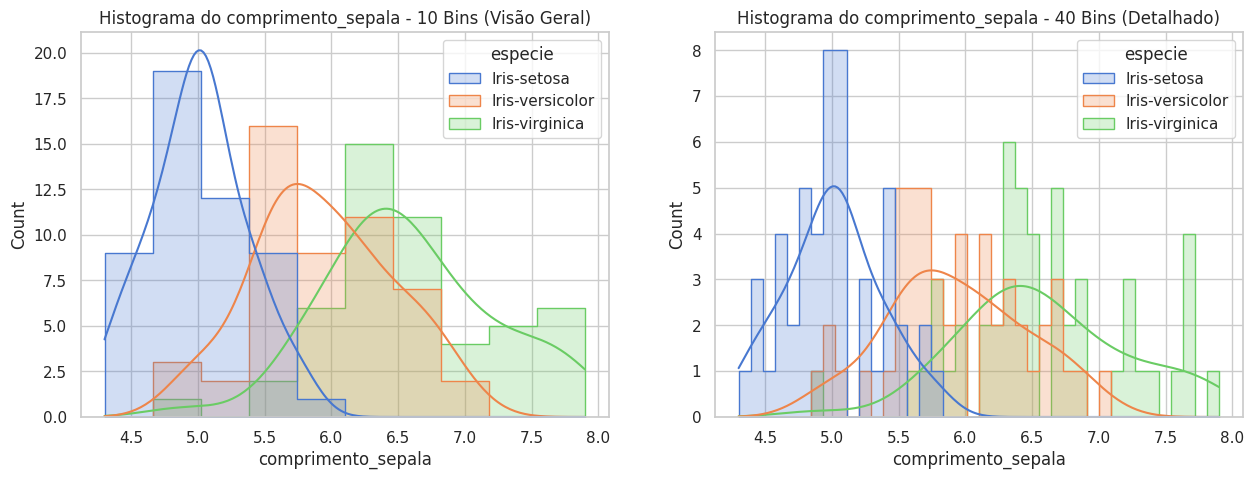

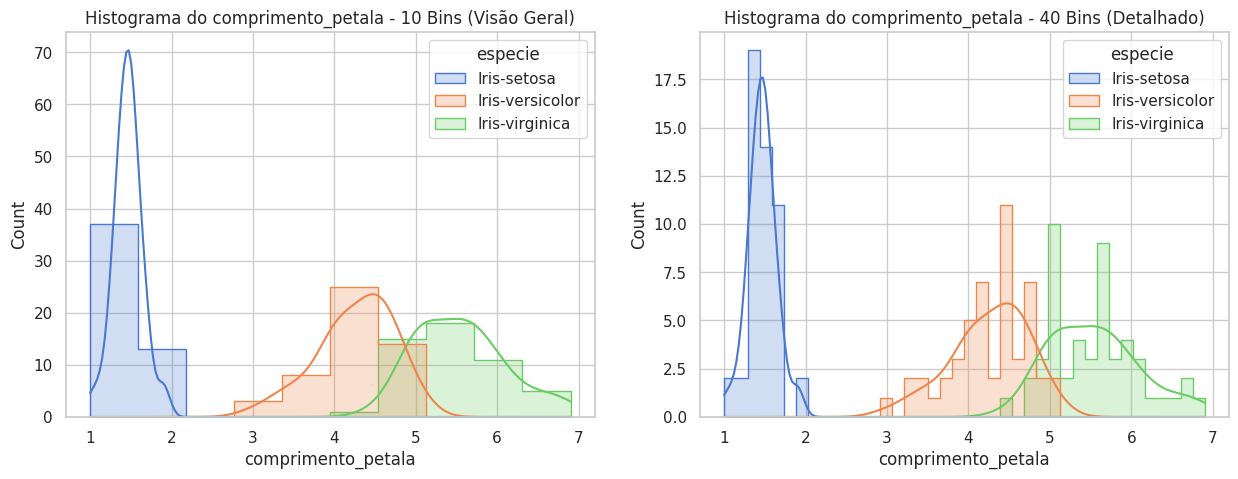

In [ ]:
sns.set_theme(style="whitegrid", palette="muted")

dataset = '/content/iris.data'

colunas = ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala', 'especie']

try:
    df = pd.read_csv(dataset, header=None, names=colunas)
    print("Dataset carregado do arquivo local")

    features_analise = ['comprimento_sepala', 'comprimento_petala']

    for feature in features_analise:
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=feature, hue='especie', bins=10, kde=True, element='step')
        plt.title(f'Histograma do {feature} - 10 Bins (Visão Geral)')

        plt.subplot(1, 2, 2)
        sns.histplot(data=df, x=feature, hue='especie', bins=40, kde=True, element='step')
        plt.title(f'Histograma do {feature} - 40 Bins (Detalhado)')

        plt.show()

except Exception as e:
    print(e)

### Considerações

#### Contextualização
Para esta atividade, utilizei o Dataset Iris, um conjunto de dados clássico e de fácil entendimento. A idéia é aplicar e reforçar o conhecimento das aulas. O dataset é composto por 150 amostras de flores, divididas igualmente em 3 classes (espécies): Iris-setosa, Iris-versicolor e Iris-virginica. Cada amostra possui 4 atributos numéricos (features) baseados nas medidas de largura e comprimento das suas pétalas e sépalas.

* Peguei o DataSet desse site: https://www.sakurai.dev.br/classificacao-iris/

#### Análise
Ao gerar os histogramas para as features Comprimento da Sépala e Comprimento da Pétala, pude observar como a escolha da feature impacta o desempenho de um classificador:

No gráfico do Comprimento da Sépala observei uma significativa sobreposição entre as classes. Notei que as curvas da Iris-versicolor (laranja) e da Iris-virginica (verde) se misturam consideravelmente na faixa entre 5.5cm e 7.0cm. Do ponto de vista de Machine Learning, essa é uma feature "fraca" para distinguir essas duas espécies, pois um algoritmo teria dificuldade em traçar uma fronteira de decisão clara, resultando em erros de classificação, assim como comentado em sala de aula.

No gráfico do Comprimento da Pétala: O cenário é oposto. Percebi que a classe Iris-setosa (azul) está completamente isolada das demais, sem nenhuma sobreposição. Além disso, a separação entre Versicolor e Virginica é muito mais nítida do que na sépala. Isso indica que o comprimento da pétala é uma feature discriminante excelente, permitindo que modelos simples alcancem alta acurácia.

#### Bins
Realizei a comparação visual utilizando 10 bins e 40 bins para entender o comportamento das distribuições:

Com 10 Bins (Generalização): Esta visualização se mostrou superior para a análise exploratória. Com agrupamentos maiores, o gráfico suavizou os dados, permitindo enxergar claramente a tendência central e a forma de "sino" de cada classe. Foi mais fácil identificar as médias e as áreas de intersecção entre as classes.

Com 40 Bins (Detalhamento): Para um dataset pequeno de apenas 150 amostras, o uso de 40 bins gerou muito ruído. O histograma ficou irregular e "dentado", com vários buracos e picos artificiais que não representam necessariamente o comportamento real da natureza da flor, mas sim a escassez de dados em intervalos muito específicos. Concluo que aumentar a granularidade nem sempre traz mais informação útil; neste caso, dificultou a visualização do padrão global, situação essas que ainda não havia visto, por isso decidir manter esse valor nesse cenário.


## Parte 2A: Experimento

### Código

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

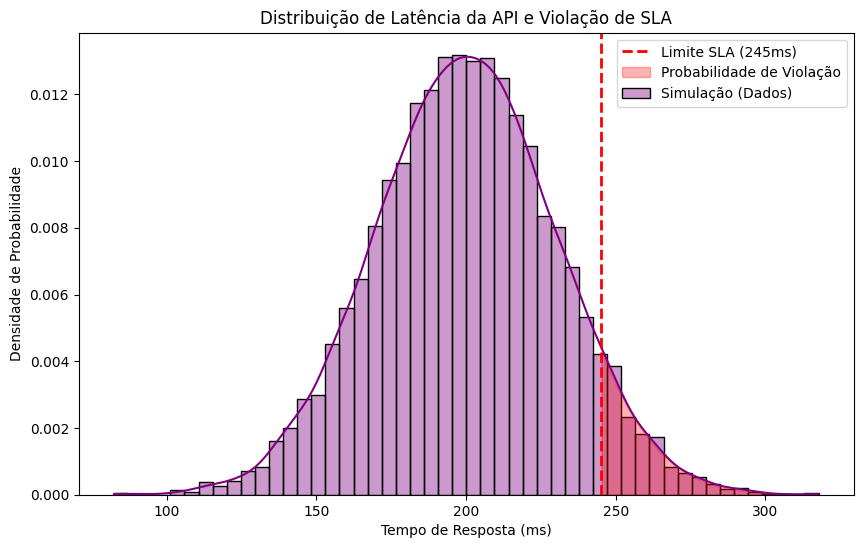


--- CÁLCULOS ESTATÍSTICOS ---
1. Cálculo do Z-Score:
   Z = (245 - 200) / 30 = 1.50
   (O valor 245 está a 1.50 desvios padrão acima da média)

2. Probabilidade Teórica (P > 245ms):
   Pelo Z-score padronizado: 0.0668 (6.68%)
   Pelo cálculo direto (Python): 0.0668 (6.68%)

3. Validação na Simulação (Dados Artificiais):
   De 10000 requisições, 676 violaram o SLA.
   Probabilidade observada: 0.0676 (6.76%)


In [2]:
media_mu = 200
desvio_sigma = 30
n_amostras = 10000

np.random.seed(42) # garantir que os resultados sejam iguais aos meus
dados_api = np.random.normal(media_mu, desvio_sigma, n_amostras)

plt.figure(figsize=(10, 6))

sns.histplot(
    dados_api,
    kde=True,
    bins=50,
    color='purple',
    stat='density',
    label='Simulação (Dados)',
    alpha=0.4
)

limite_sla = 245
plt.axvline(limite_sla, color='red', linestyle='--', linewidth=2, label=f'Limite SLA ({limite_sla}ms)')

x_range = np.linspace(min(dados_api), max(dados_api), 1000)
pdf_teorica = norm.pdf(x_range, media_mu, desvio_sigma)
plt.fill_between(x_range, pdf_teorica, where=(x_range > limite_sla), color='red', alpha=0.3, label='Probabilidade de Violação')

plt.title('Distribuição de Latência da API e Violação de SLA')
plt.xlabel('Tempo de Resposta (ms)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

# Pergunta: Qual a probabilidade de P(X > 245)?

print("\n--- CÁLCULOS ESTATÍSTICOS ---")

# Versão Padronizada (Z-Score) - Fórmula: Z = (X - µ) / σ
z_score = (limite_sla - media_mu) / desvio_sigma
print(f"1. Cálculo do Z-Score:")
print(f"   Z = ({limite_sla} - {media_mu}) / {desvio_sigma} = {z_score:.2f}")
print(f"   (O valor 245 está a {z_score:.2f} desvios padrão acima da média)")

prob_acumulada_z = norm.cdf(z_score)
prob_violacao_z = 1 - prob_acumulada_z

# Versão Não Padronizada
prob_violacao_real = 1 - norm.cdf(limite_sla, loc=media_mu, scale=desvio_sigma)

print(f"\n2. Probabilidade Teórica (P > {limite_sla}ms):")
print(f"   Pelo Z-score padronizado: {prob_violacao_z:.4f} ({prob_violacao_z*100:.2f}%)")
print(f"   Pelo cálculo direto (Python): {prob_violacao_real:.4f} ({prob_violacao_real*100:.2f}%)")

# Validação
contagem_violacoes = np.sum(dados_api > limite_sla)
prob_empirica = contagem_violacoes / n_amostras

print(f"\n3. Validação na Simulação (Dados Artificiais):")
print(f"   De {n_amostras} requisições, {contagem_violacoes} violaram o SLA.")
print(f"   Probabilidade observada: {prob_empirica:.4f} ({prob_empirica*100:.2f}%)")

### Considerações

Definição do Experimento:

Para este estudo, como sou desenvolvedor web, simulei o tempo de latência de uma API em um ambiente de microsserviços. O objetivo foi calcular a probabilidade de violação de um SLA (Acordo de Nível de Serviço).

Parâmetros

- **Variável ($X$):** Tempo de resposta (ms).
- **Distribuição:** Normal ($\mu=200ms, \sigma=30ms$).
- **Evento de Interesse:** Latência superior a 245ms ($X > 245$).

Análise dos Resultados

1. **Padronização (Z-Score):** Ao aplicar a transformação para a escala Z, obtivemos $Z = 1.5$. Isso indica que o limite de tolerância do sistema (245ms) está posicionado a 1.5 desvios padrão acima da média histórica.
2. **Cálculo de Probabilidade:** A área sob a curva normal à direita de $Z=1.5$ corresponde teoricamente a **6.68%**. Isso significa que, estatisticamente, espera-se que ~6.7% das requisições sejam lentas demais.
3. **Validação por Simulação:** Ao gerar 10.000 amostras artificiais, a taxa de erro observada foi de **6.76%**. A proximidade entre o valor teórico e o empírico valida o modelo estatístico, demonstrando que a Distribuição Normal é uma ferramenta robusta para prever riscos de performance em sistemas de software.

## Parte 1C: Simulação Binomial

### Código

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import math

--- COMPARAÇÃO: P(X = 40 sucessos) ---
1. Cálculo pela Equação: 0.1398 (13.98%)
2. Resultado da Simulação: 0.1424 (14.24%)


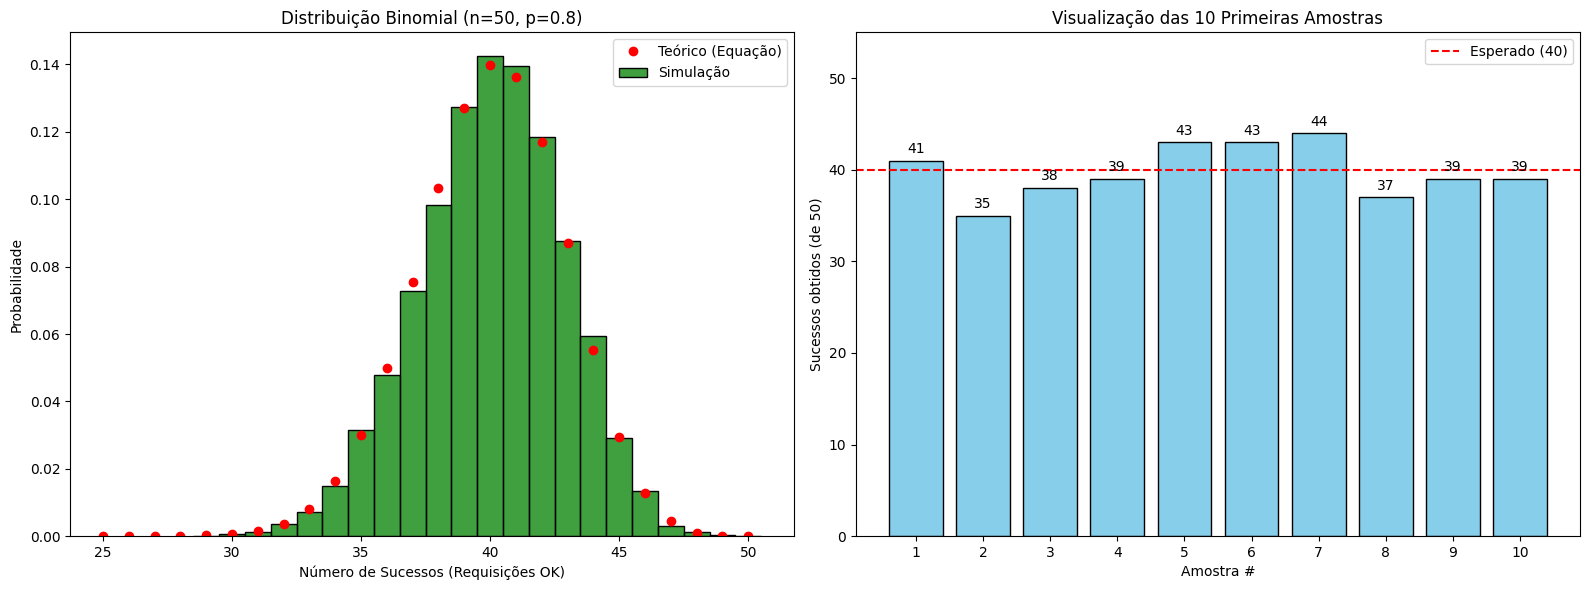

In [6]:
n_trials = 50                   # n: Tamanho do lote (50 tentativas por vez)
prob_sucesso = 0.80             # p: Probabilidade de sucesso (80% das requisições dão 200 OK)
prob_falha = 1 - prob_sucesso   # q: Probabilidade de falha (20%)
n_simulacoes = 10000            # testar 10.000 lotes

np.random.seed(42)
resultados_simulacao = np.random.binomial(n=n_trials, p=prob_sucesso, size=n_simulacoes)


# calcular a probabilidade de ter exatamente 40 sucessos (que é a média esperada: 50 * 0.80 = 40)
k_interesse = 40

# Cálculo pela Formula
combinacao = math.comb(n_trials, k_interesse)
prob_teorica_formula = combinacao * (prob_sucesso ** k_interesse) * (prob_falha ** (n_trials - k_interesse))

# Cálculo pela Simulação
total_k_sucessos = np.sum(resultados_simulacao == k_interesse)
prob_simulada = total_k_sucessos / n_simulacoes

print(f"--- COMPARAÇÃO: P(X = {k_interesse} sucessos) ---")
print(f"1. Cálculo pela Equação: {prob_teorica_formula:.4f} ({prob_teorica_formula*100:.2f}%)")
print(f"2. Resultado da Simulação: {prob_simulada:.4f} ({prob_simulada*100:.2f}%)")



plt.figure(figsize=(16, 6))

# Gráfico da Esquerda: Histograma da Distribuição Completa
plt.subplot(1, 2, 1)

# Plotando os dados simulados
sns.histplot(resultados_simulacao, discrete=True, color='green', stat='probability', label='Simulação')

# Plotando a linha teórica (pontos vermelhos)
x_range = np.arange(25, 51) # Focando aonde tem dados
y_teorico = binom.pmf(x_range, n_trials, prob_sucesso)
plt.plot(x_range, y_teorico, 'ro', label='Teórico (Equação)')

plt.title(f'Distribuição Binomial (n={n_trials}, p={prob_sucesso})')
plt.xlabel('Número de Sucessos (Requisições OK)')
plt.ylabel('Probabilidade')
plt.legend()

# Mostra quantos sucessos ocorreram nos primeiros 10 testes
plt.subplot(1, 2, 2)
primeiras_10_amostras = resultados_simulacao[:10]
indices = np.arange(1, 11)

bars = plt.bar(indices, primeiras_10_amostras, color='skyblue', edgecolor='black')
plt.axhline(y=40, color='red', linestyle='--', label='Esperado (40)') # Linha da média

plt.title('Visualização das 10 Primeiras Amostras')
plt.xlabel('Amostra #')
plt.ylabel('Sucessos obtidos (de 50)')
plt.xticks(indices)
plt.ylim(0, 55)
plt.legend()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Considerações

Definição da Simulação:

Analisei a confiabilidade de processamento de lotes em um servidor. Configurei o sistema para processar lotes de $n=50$ requisições, onde cada requisição tem uma probabilidade de sucesso de $s=0.80$ (80%).

Objetivo:

Calcular a probabilidade de, em um lote de 50, obter exatamente a média esperada de sucessos ($k=40$).

Análise Comparativa:

1. Cálculo Analítico: Utilizando a equação da probabilidade binomial ($P(k) = \binom{n}{k} s^k (1-s)^{n-k}$), a probabilidade teórica de obter exatos 40 sucessos é de aproximadamente 13.98% (resultado obtido do teste rodando o código).
2. Simulação de Monte Carlo: A simulação com 10.000 amostras convergiu para um valor muito próximo, aprox. 14.24 (resultado obtido do teste rodando o código).

Interpretação do Histograma:

O histograma gerado demonstra que a distribuição é centrada no 40. No entanto, mesmo que 40 seja o resultado mais provável individualmente, a soma das probabilidades ao seu redor (38, 39, 41, 42) é alta. Isso mostra a variabilidade intrínseca do processo: mesmo um sistema estável com 80% de eficiência raramente entregará exatamente 80% de sucesso em pequenas amostras; haverá uma flutuação natural ao redor dessa média.